# <center> Homework 2 
   

In [187]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tr_mcc_codes=pd.read_csv(filepath_or_buffer = "tr_mcc_codes.csv", sep = ';')
tr_types=pd.read_csv(filepath_or_buffer = "tr_types.csv", sep = ';')
transactions=pd.read_csv(filepath_or_buffer = "transactions.csv", sep = ',', nrows=1_000_000)
gender_train=pd.read_csv(filepath_or_buffer = "gender_train.csv", sep = ',')

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions считайте только первые 1000000 строк.

#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться N строк. Число строк сообщите преподавателю

In [188]:
### Type your code here
merded = transactions.merge(tr_mcc_codes).merge(tr_types).merge(gender_train, how="left")
merded

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),1.0
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,Денежные переводы,Списание с карты по операции “перевода с карты...,1.0
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,1.0
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,1.0
...,...,...,...,...,...,...,...,...,...
999579,98801178,269 10:29:06,5921,1010,-23016.59,127873,Магазины с продажей спиртных напитков на вынос...,Покупка. POS ТУ СБ РФ,0.0
999580,98801178,270 10:26:45,5211,1010,-61380.88,10114209,Лесо- и строительный материал,Покупка. POS ТУ СБ РФ,0.0
999581,98801178,270 15:18:53,5921,1010,-11800.27,10105341,Магазины с продажей спиртных напитков на вынос...,Покупка. POS ТУ СБ РФ,0.0
999582,98801178,271 12:47:13,5211,1010,-16170.59,10114209,Лесо- и строительный материал,Покупка. POS ТУ СБ РФ,0.0


In [189]:
del tr_mcc_codes
del tr_types
del gender_train
del transactions

#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [190]:
### Type your code here
# transactions.groupby('gender')
asd = merded.loc[merded['amount'] < 0].groupby('gender')['amount'].mean()
asd

gender
0.0   -53376.917122
1.0   -86094.972042
Name: amount, dtype: float64

In [191]:
print(f"{abs(asd[0]-asd[1]):.2f}")

32718.05


#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [192]:
### Type your code here
merded['mcc_code+tr_type'] = merded['mcc_code'].astype(str) + merded['tr_type'].astype(str)
merded

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,mcc_code+tr_type
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),1.0,60117010
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,Денежные переводы,Списание с карты по операции “перевода с карты...,1.0,48292330
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,1.0,54991010
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,1.0,54991010
...,...,...,...,...,...,...,...,...,...,...
999579,98801178,269 10:29:06,5921,1010,-23016.59,127873,Магазины с продажей спиртных напитков на вынос...,Покупка. POS ТУ СБ РФ,0.0,59211010
999580,98801178,270 10:26:45,5211,1010,-61380.88,10114209,Лесо- и строительный материал,Покупка. POS ТУ СБ РФ,0.0,52111010
999581,98801178,270 15:18:53,5921,1010,-11800.27,10105341,Магазины с продажей спиртных напитков на вынос...,Покупка. POS ТУ СБ РФ,0.0,59211010
999582,98801178,271 12:47:13,5211,1010,-16170.59,10114209,Лесо- и строительный материал,Покупка. POS ТУ СБ РФ,0.0,52111010


In [193]:
temp_merded = merded[(merded['amount'] < 0) & (merded.groupby('customer_id')['mcc_code+tr_type'].count() >= 10)]
temp_merded

/tmp/ipykernel_4567/64753729.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_merded = merded[(merded['amount'] < 0) & (merded.groupby('customer_id')['mcc_code+tr_type'].count() >= 10)]


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,mcc_code+tr_type
115617,36840873,436 21:02:20,4814,1030,-2245.92,888913,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,NaN,48141030
127946,88319560,448 18:01:16,6011,2010,-67377.47,688721,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ Сбербанк России,NaN,60112010
186730,96501153,121 08:27:41,4814,1030,-6737.75,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030
293048,98998782,117 04:58:23,4814,1030,-449.18,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0.0,48141030
302489,13659037,438 00:00:00,5411,1110,-4379.54,20002462,"Бакалейные магазины, супермаркеты",Покупка. POS ТУ Россия,NaN,54111110
350821,74376012,339 07:46:18,4814,1030,-4491.83,201265,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,NaN,48141030
496551,75393406,68 13:28:42,7311,1100,-628.86,NaN,Рекламные услуги,Покупка. ТУ Россия,1.0,73111100
571978,27284097,240 08:04:28,5331,1010,-2807.39,332859,Универсальные магазины,Покупка. POS ТУ СБ РФ,NaN,53311010
600423,75211941,424 14:47:23,4829,2370,-437953.58,888901,Денежные переводы,Списание с карты на карту по операции <перевод...,0.0,48292370
611788,23953673,212 16:47:42,4814,1030,-6737.75,889000,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030


In [194]:
temp_merded["amount"].var()

np.float64(12398843839.830526)

In [195]:
merded["amount"].var()

np.float64(229376742811.4502)

In [196]:
print(merded["amount"].var()/temp_merded["amount"].var())

18.49984932261115


In [197]:
temp_merded.groupby("mcc_code+tr_type")['amount'].var()

mcc_code+tr_type
48141030    6.759149e+06
48292370    7.723836e+10
53311010             NaN
54111110             NaN
54991010             NaN
58121110             NaN
59481110             NaN
60112010             NaN
73111100             NaN
Name: amount, dtype: float64

#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	+
    - 2) Списание после проведения претензионной работы	+
    - 3) Плата за получение наличных. Россия	+
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте +	
    - 5) Плата за получение наличных в АТМ. Россия	 +
    - 6) Наличные. Зарубеж. банк	-
    - 7) Возврат покупки. POS ТУ Россия +

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]


Взнос наличных через АТМ (в своем тер.банке)                                                             0

Плата за перевод на карту (с карты) через POS (из одного ТБ в другой ТБ)                                 0

Списание с карты по операции “перевода с карты на карту” через POS (из одного ТБ в другой ТБ)            0

Перевод на карту (с карты) через АТМ (в пределах одного тер.банка)                                       1

Плата за получение наличных. Зарубеж.                                                                    1

Наличные.  Зарубеж. банк                                                                                 1

Покупка.ТУ СБ РФ                                                                                         1

Взнос наличных через POS                                                                                 1


In [198]:
### Type your code here
merded[(merded['amount'] > 0)].groupby(["tr_type", "gender"])["amount"].max().groupby("gender").nsmallest(5)

gender  tr_type  gender
0.0     4051     0.0        1122.96
        4110     0.0        2245.92
        4210     0.0        2245.92
        2370     0.0        2335.75
        4100     0.0        5041.86
1.0     2020     1.0        2245.92
        4110     1.0        2245.92
        1010     1.0       28803.87
        8100     1.0       64682.37
        6000     1.0       79280.83
Name: amount, dtype: float64

In [199]:
# merded[(merded["gender"] == 0.0) & (merded["amount"] > 0)].groupby("customer_id")[
#     "amount"
# ].max().sort_values(ascending=True).head(5)

In [200]:
merded[merded['amount'] < 0].groupby("tr_description")['gender'].nunique().sort_values()

tr_description
Взнос наличных через АТМ (в своем тер.банке)                                                             0
Плата за перевод на карту (с карты) через POS (из одного ТБ в другой ТБ)                                 0
Списание с карты по операции “перевода с карты на карту” через POS (из одного ТБ в другой ТБ)            0
Перевод на карту (с карты) через АТМ (в пределах одного тер.банка)                                       1
Плата за получение наличных. Зарубеж.                                                                    1
Наличные.  Зарубеж. банк                                                                                 1
Покупка.ТУ СБ РФ                                                                                         1
Взнос наличных через POS                                                                                 1
Наличные.   АТМ Россия                                                                                   2
Выдача наличных через 

#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [201]:
### Type your code here
asdg = merded["tr_datetime"].str.split(" ").apply(lambda x: int(x[0]))

merded["tr_day"] = asdg
merded["tr_day"]


0           0
1           1
2           1
3           1
4           2
         ... 
999579    269
999580    270
999581    270
999582    271
999583    271
Name: tr_day, Length: 999584, dtype: int64

In [202]:
merded.groupby("tr_day")["mcc_code"].nunique().nlargest(20)

tr_day
393    92
160    90
217    89
343    88
448    88
202    87
312    87
351    87
148    86
211    86
225    86
321    86
330    86
332    86
333    86
357    86
362    86
428    86
433    86
86     85
Name: mcc_code, dtype: int64

In [203]:
filtered = merded.groupby("tr_day").filter(lambda x: x["mcc_code"].nunique() > 75)
filtered

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,mcc_code+tr_type,tr_day
6,39026145,3 15:29:08,5499,1010,-1010.66,NaN,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,1.0,54991010,3
7,39026145,4 12:11:57,5200,1010,-2829.85,NaN,Товары для дома,Покупка. POS ТУ СБ РФ,1.0,52001010,4
10,39026145,7 14:23:17,5541,1010,-14643.37,NaN,Станции техобслуживания,Покупка. POS ТУ СБ РФ,1.0,55411010,7
11,39026145,7 14:40:02,5499,1010,-3458.71,NaN,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,1.0,54991010,7
22,39026145,13 11:17:34,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,13
...,...,...,...,...,...,...,...,...,...,...,...
999578,98801178,268 14:51:26,5921,1010,-7946.05,127873,Магазины с продажей спиртных напитков на вынос...,Покупка. POS ТУ СБ РФ,0.0,59211010,268
999580,98801178,270 10:26:45,5211,1010,-61380.88,10114209,Лесо- и строительный материал,Покупка. POS ТУ СБ РФ,0.0,52111010,270
999581,98801178,270 15:18:53,5921,1010,-11800.27,10105341,Магазины с продажей спиртных напитков на вынос...,Покупка. POS ТУ СБ РФ,0.0,59211010,270
999582,98801178,271 12:47:13,5211,1010,-16170.59,10114209,Лесо- и строительный материал,Покупка. POS ТУ СБ РФ,0.0,52111010,271


In [204]:
groupde = filtered.groupby(["mcc_code", "mcc_description", "gender"])

In [205]:
groupde["amount"].describe()

count  \
mcc_code mcc_description                                    gender          
742      Ветеринарные услуги                                0.0      10.0   
                                                            1.0       3.0   
1711     Генеральные подрядчики по вентиляции, теплоснаб... 0.0       1.0   
                                                            1.0       7.0   
1731     Подрядчики по электричеству                        1.0       1.0   
...                                                                   ...   
9311     Налоговые платежи                                  0.0       4.0   
                                                            1.0      14.0   
9399     Правительственные услуги, нигде ранее не класси... 0.0      17.0   
                                                            1.0      60.0   
9402     Почтовые услуги — только правительство             1.0       1.0   

                                                                             mean  \
mcc_code mcc_description                                    gender                  
742      Ветеринарные услуги                                0.0     -31602.281000   
                                                            1.0     -42221.046667   
1711     Генеральные подрядчики по вентиляции, теплоснаб... 0.0    -674897.690000   
                                                            1.0     -15808.038571   
1731     Подрядчики по электричеству                        1.0     -55923.300000   
...                                                                           ...   
9311     Налоговые платежи                                  0.0     -56513.247500   
                                                            1.0     -23582.117143   
9399     Правительственные услуги, нигде ранее не класси... 0.0     -74242.828235   
                                                            1.0     -22124.073000   
9402     Почтовые услуги — только правительство             1.0      -4581.670000   

                                                                              std  \
mcc_code mcc_description                                    gender                  
742      Ветеринарные услуги                                0.0      33426.310138   
                                                            1.0      15447.007959   
1711     Генеральные подрядчики по вентиляции, теплоснаб... 0.0               NaN   
                                                            1.0       7371.149024   
1731     Подрядчики по электричеству                        1.0               NaN   
...                                                                           ...   
9311     Налоговые платежи                                  0.0     123117.520144   
                                                            1.0      45831.371152   
9399     Правительственные услуги, нигде ранее не класси... 0.0     144453.829175   
                                                            1.0      24286.822675   
9402     Почтовые услуги — только правительство             1.0               NaN   

                                                                          min  \
mcc_code mcc_description                                    gender              
742      Ветеринарные услуги                                0.0    -115664.66   
                                                            1.0     -54126.57   
1711     Генеральные подрядчики по вентиляции, теплоснаб... 0.0    -674897.69   
                                                            1.0     -30095.27   
1731     Подрядчики по электричеству                        1.0     -55923.30   
...                                                                       ...   
9311     Налоговые платежи                                  0.0    -238431.81   
                                                            1.0    -182817.54   
9399     Правительственные услуги, нигде ран

In [206]:
gfdjk = groupde["mcc_description"].count()

In [207]:
gfdjk.to_csv("asd.csv")

последний столбец количество

5621,Готовая женская одежда,0.0,370

5621,Готовая женская одежда,1.0,80

5631,Аксессуары для женщин,0.0,122

5631,Аксессуары для женщин,1.0,33

Судя по этим данным 1 = мужчины, 0 = женщины

In [208]:
filtered[filtered["mcc_description"] == "Флористика"].groupby("gender")['amount'].median()

gender
0.0   -13890.99
1.0   -18865.69
Name: amount, dtype: float64

у мужчин больше

In [209]:
filtered[filtered["mcc_description"] == "Ценные бумаги: брокеры/дилеры"].groupby("gender")['amount'].median()

gender
0.0    -6737.75
1.0   -11229.58
Name: amount, dtype: float64

у мужчин больше

In [210]:
filtered[
    filtered["mcc_description"]
    == "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков"
].groupby("gender")["amount"].median()

gender
0.0    -9387.93
1.0   -13475.49
Name: amount, dtype: float64

у мужчин больше

#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими. +
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.-
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.+
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%) -
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин. +

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [236]:
def plot_pivot_table(pivot_table):

    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

In [212]:
# Type your code here
labels = ["Very High", "High", "Middle", "Low", "Very Low"]
merded["amount_bucket"] = pd.qcut(merded[merded["amount"] < 0]["amount"], 5,labels=labels)
merded.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,mcc_code+tr_type,tr_day,amount_bucket
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,0,Very Low
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),1.0,60117010,1,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,Денежные переводы,Списание с карты по операции “перевода с карты...,1.0,48292330,1,Very High
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,1.0,54991010,1,Very Low
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,1.0,54991010,2,Very Low


In [213]:
merded['amount_bucket'] = merded["amount_bucket"].cat.add_categories('Income')

In [217]:
merded["amount_bucket"] = merded["amount_bucket"].fillna('Income')

In [218]:
merded.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,mcc_code+tr_type,tr_day,amount_bucket
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,0,Very Low
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),1.0,60117010,1,Income
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,Денежные переводы,Списание с карты по операции “перевода с карты...,1.0,48292330,1,Very High
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,1.0,54991010,1,Very Low
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,1.0,54991010,2,Very Low


In [221]:
merded["tr_hour"] = merded["tr_datetime"].str.split(" ").apply(lambda x: x[1]).str.split(":").apply(lambda x: int(x[0]))

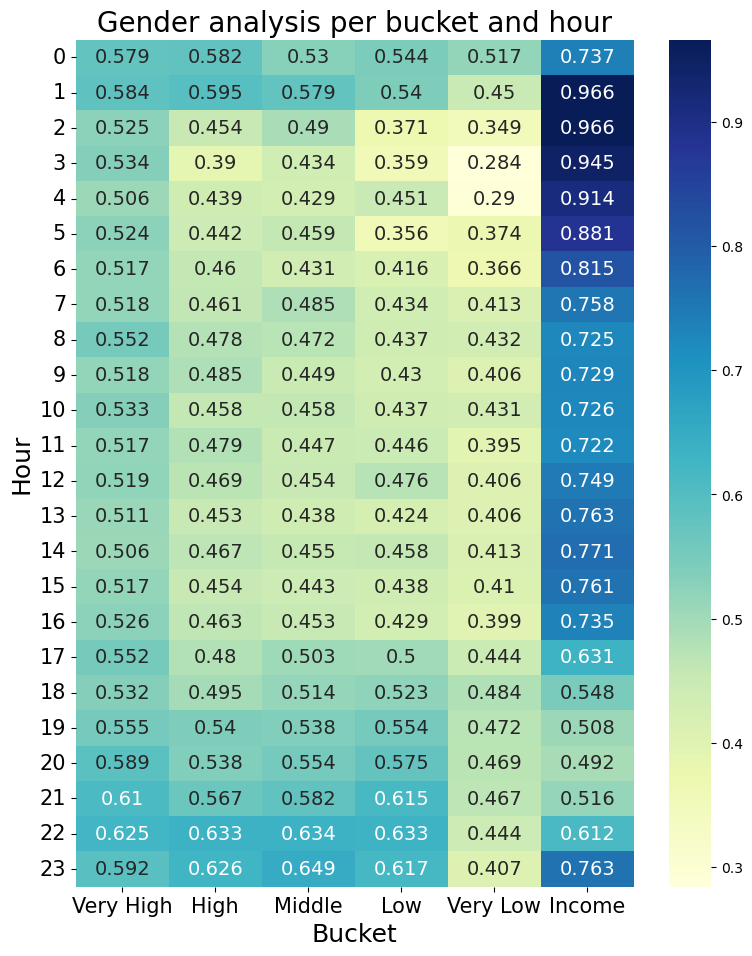

In [237]:
djkgf = pd.pivot_table(merded, 'gender', 'tr_hour', 'amount_bucket', observed=True)
plot_pivot_table(djkgf)

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [238]:
# Type your code here
merded['tr_day']

0           0
1           1
2           1
3           1
4           2
         ... 
999579    269
999580    270
999581    270
999582    271
999583    271
Name: tr_day, Length: 999584, dtype: int64

In [256]:
fdglk = merded['mcc_code'].value_counts() > 60_000
ntohj = merded[merded['mcc_code']].isin(fdglk[fdglk].index)
good = ntohj.groupby(["tr_day", "mcc_code"]).agg({'amount': 'mean'})

KeyError: "None of [Index([4814, 6011, 4829, 5499, 5499, 5541, 5499, 5200, 5499, 4814,\n       ...\n       5921, 5411, 5912, 5411, 5921, 5921, 5211, 5921, 5211, 5921],\n      dtype='int64', length=999584)] are in the [columns]"